# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**12

seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [5]:
!ls -l {shl.data_cache}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    2405142 Apr 27 17:44 data_cache/coding_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2405142 May  7 11:14 data_cache/coding_HEH_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2405143 May  7 09:00 data_cache/coding_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  169827968 May  9 16:35 data_cache/coding_data.npy
-rw-r--r--  1 laurentperrinet  staff  169827968 May 11 13:52 data_cache/coding_test_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  -1.3425387896193824e-05  +/-  0.005884598016072352
average energy of data =  0.18808326809398868 +/- 0.07074991784868241


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.8068117666194947e-05 +/- 0.0014107773390163649
average energy of filters =  1.0 +/- 4.026288882119595e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -2.6004507309775894e-05 +/- 0.001472797489052693
average energy of filters =  1.0 +/- 4.129104294410826e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.8702498728228594e-05 +/- 0.0013714371710944425
average energy of filters =  1.0 +/- 3.8488312480383476e-17


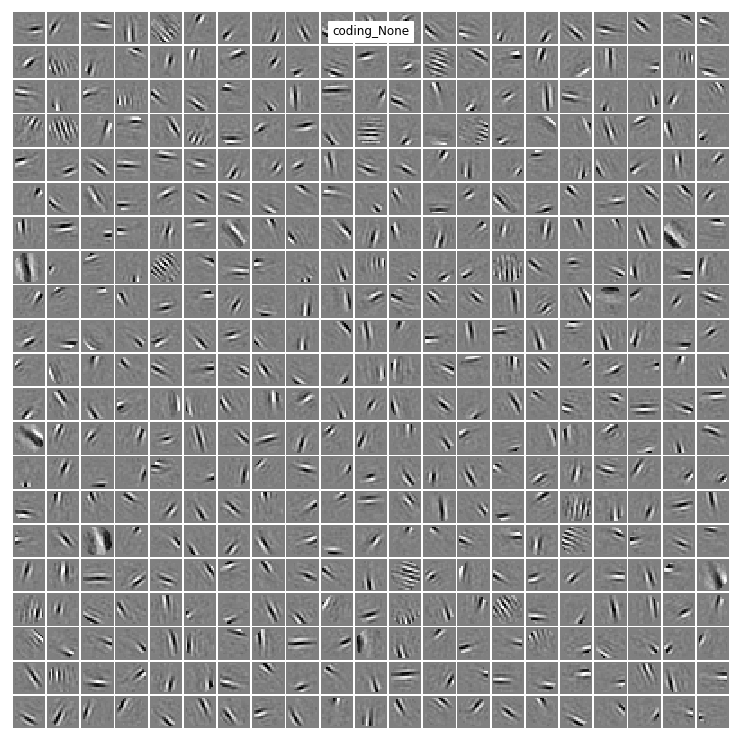

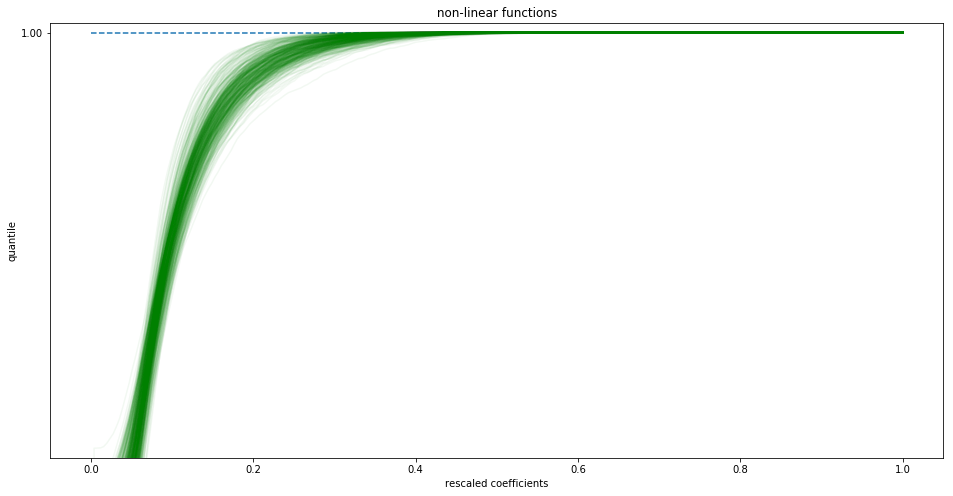

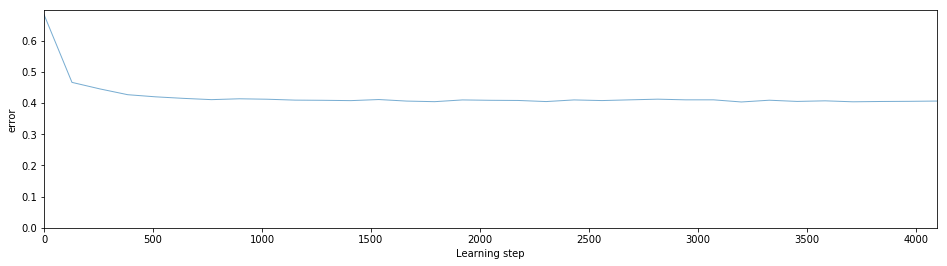

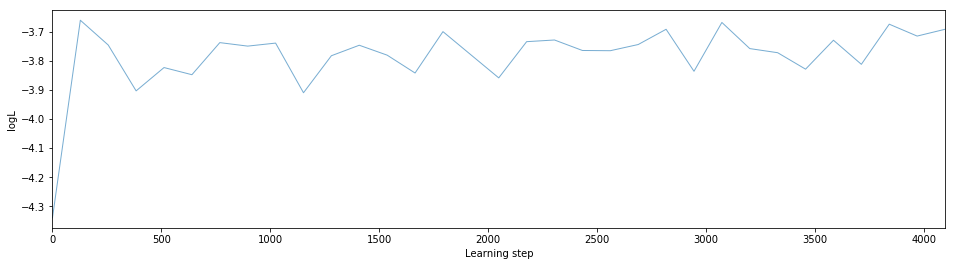

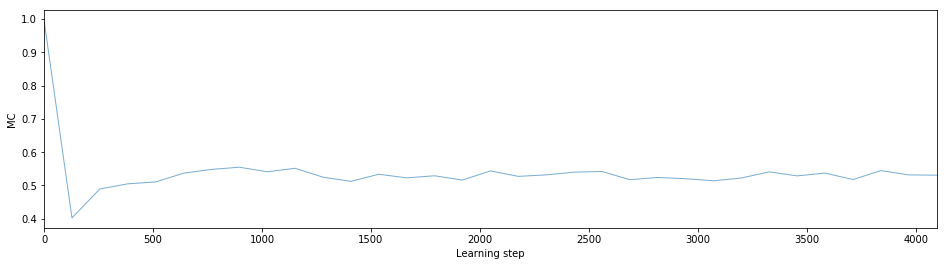

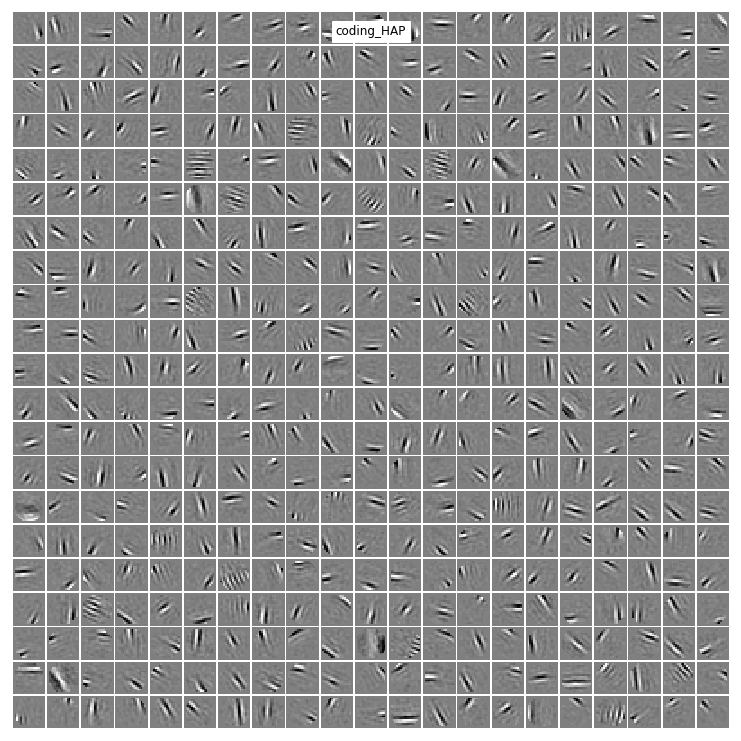

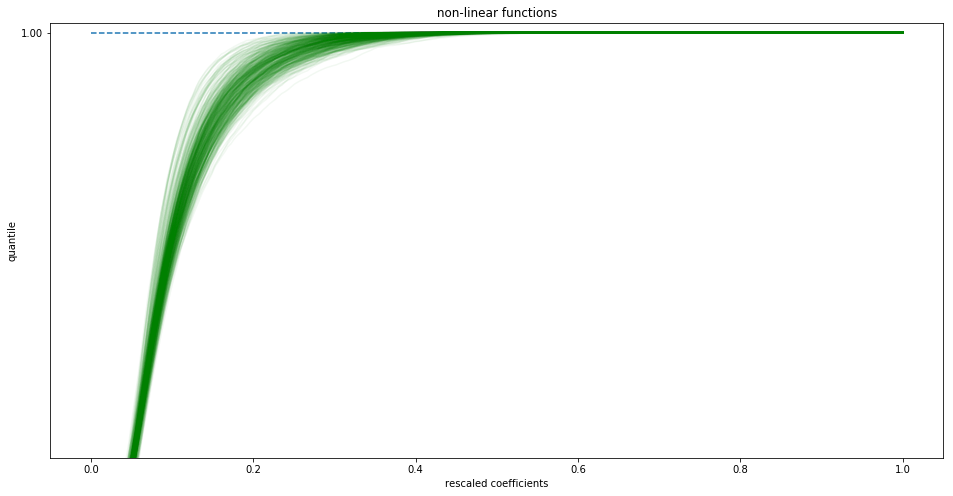

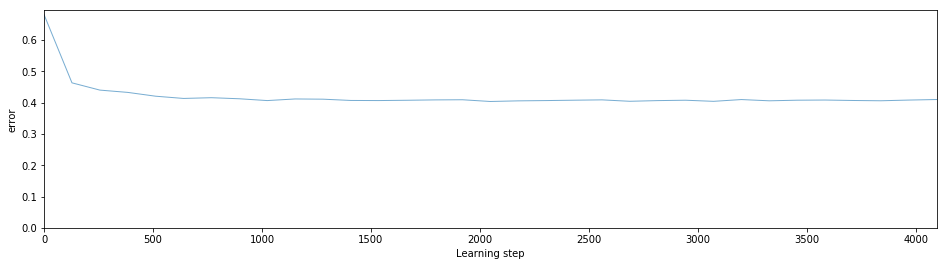

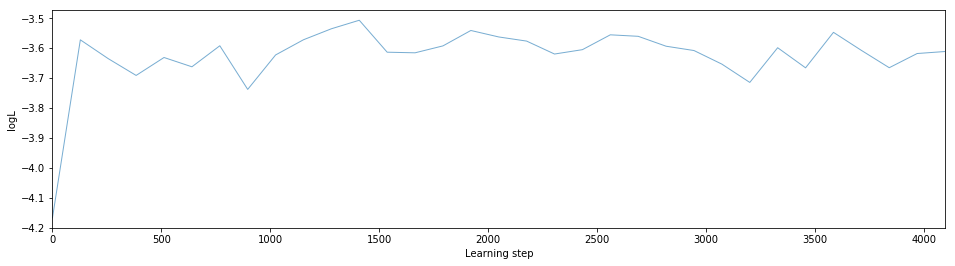

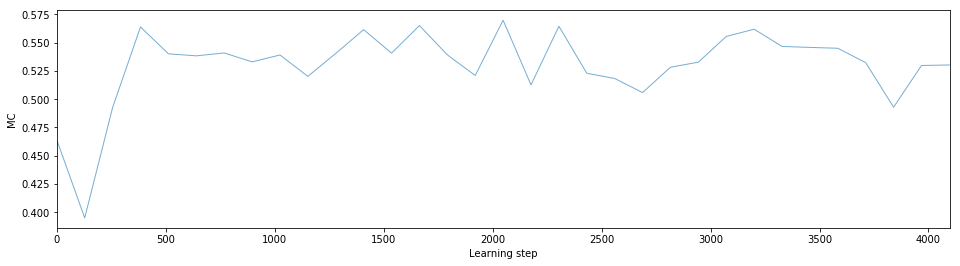

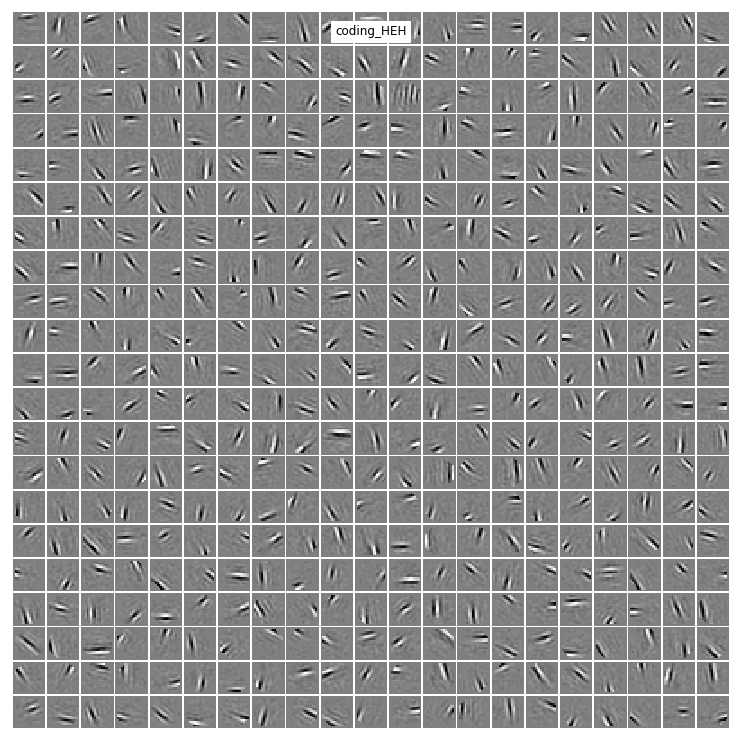

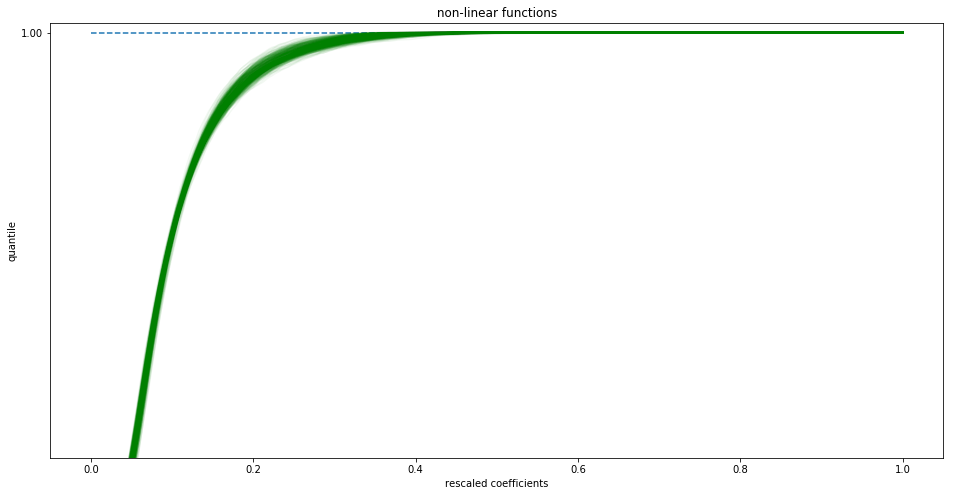

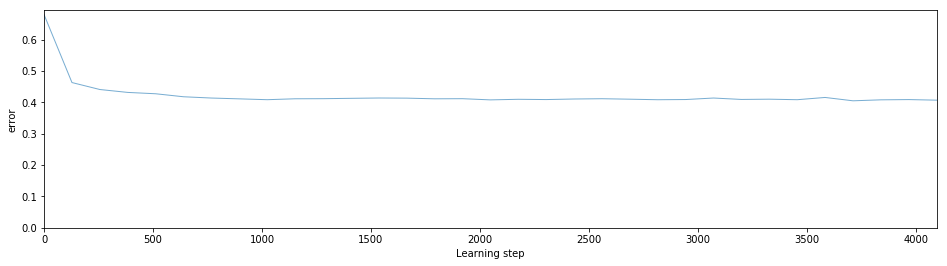

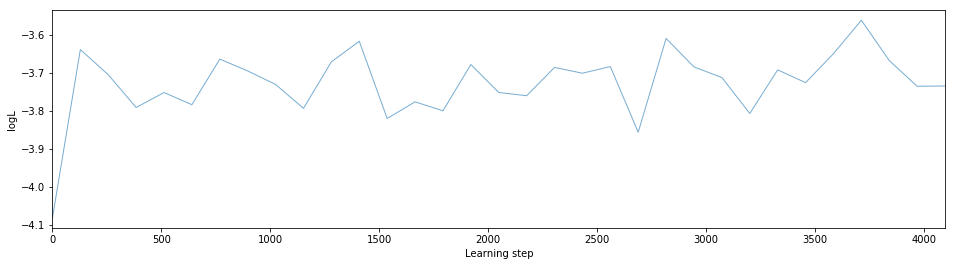

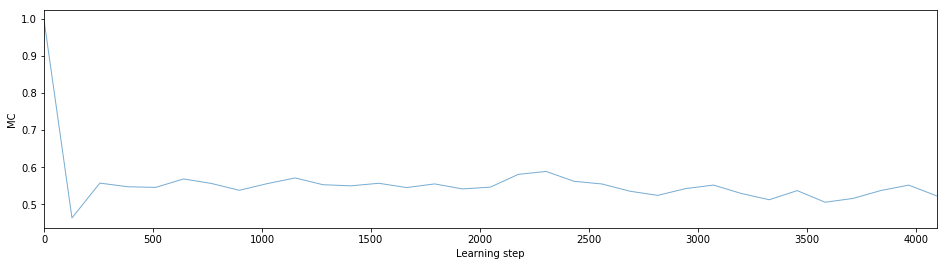

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.02145814081826765
average std of codewords =  0.14426767648938887
l0-sparseness of codewords =  0.0294507777069161
std of the average of individual patches =  0.003921525102661104


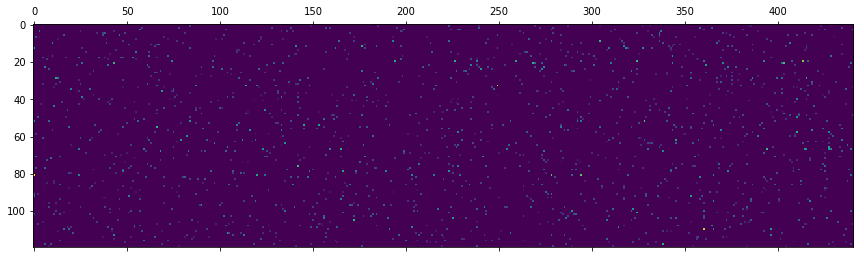

<Figure size 1080x216 with 0 Axes>

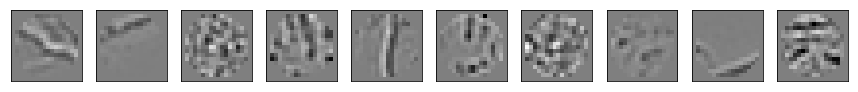

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

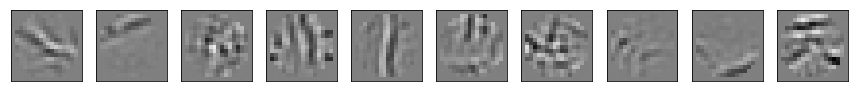

<Figure size 1080x216 with 0 Axes>

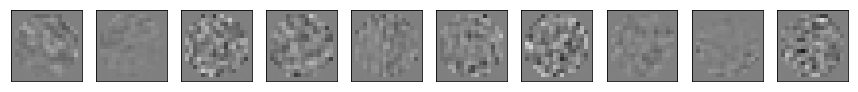

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -0.00027882064512550655 +/- 0.004645575048500721
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -0.00027882064512550655 +/- 0.10766855817492291
average energy of residual =  0.0994225671058594 +/- 0.041324923599442925
median energy of residual =  0.09884739458085964
average gain of coding =  1.9719010792608167 +/- 0.3836902550712068
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.02145814081826765
average std of codewords =  0.14426767648938885
l0-sparseness of codewords =  0.0294507777069161
std of the average of individual patches =  0.003921525102661103


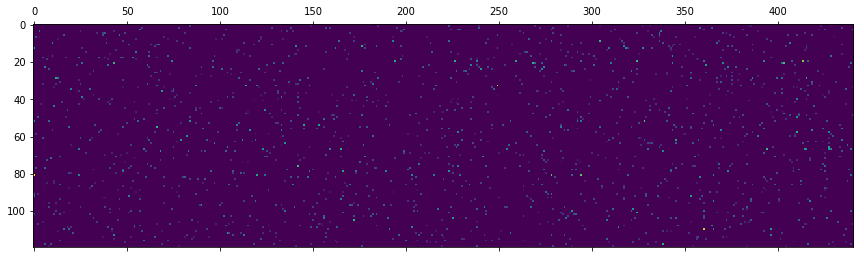

<Figure size 1080x216 with 0 Axes>

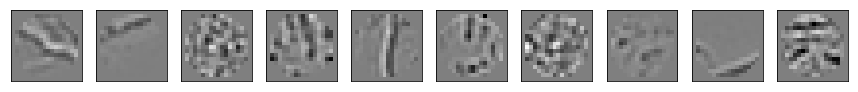

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

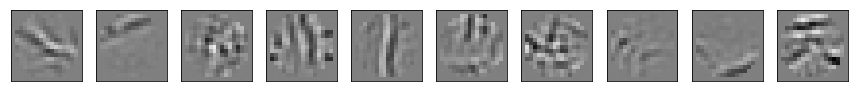

<Figure size 1080x216 with 0 Axes>

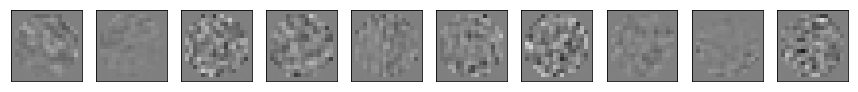

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -0.00027882064512550655 +/- 0.0046455750485007215
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -0.00027882064512550655 +/- 0.10766855817492291
average energy of residual =  0.0994225671058594 +/- 0.04132492359944293
median energy of residual =  0.09884739458085964
average gain of coding =  1.9719010792608167 +/- 0.3836902550712068
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.021162306250840146
average std of codewords =  0.14322256252372273
l0-sparseness of codewords =  0.029252032844387755
std of the average of individual patches =  0.003581890445161053


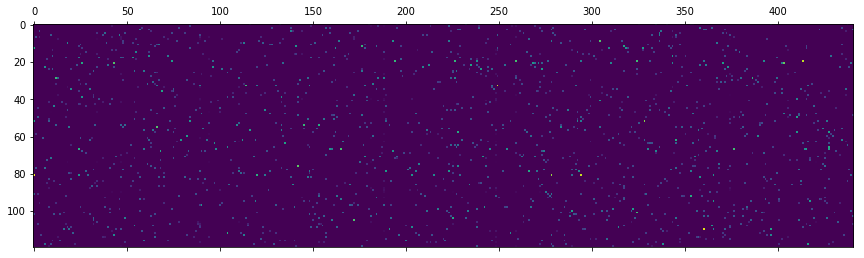

<Figure size 1080x216 with 0 Axes>

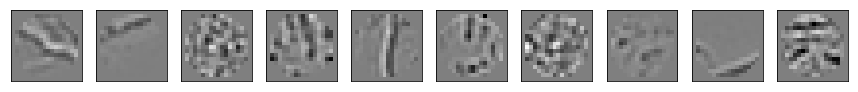

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

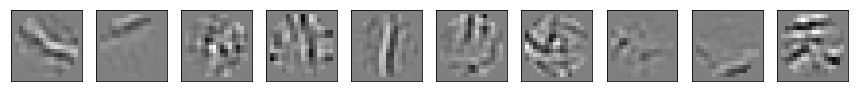

<Figure size 1080x216 with 0 Axes>

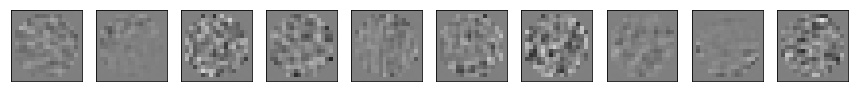

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -0.0002455177325449087 +/- 0.004689403760552912
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -0.0002455177325449087 +/- 0.10965398916999732
average energy of residual =  0.10167310744727392 +/- 0.0410686844428449
median energy of residual =  0.09982190810515579
average gain of coding =  1.9020493270352747 +/- 0.3331537193834608
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.02146475356820382
average std of codewords =  0.1443132896004413
l0-sparseness of codewords =  0.029446348852040817
std of the average of individual patches =  0.003899569223620856


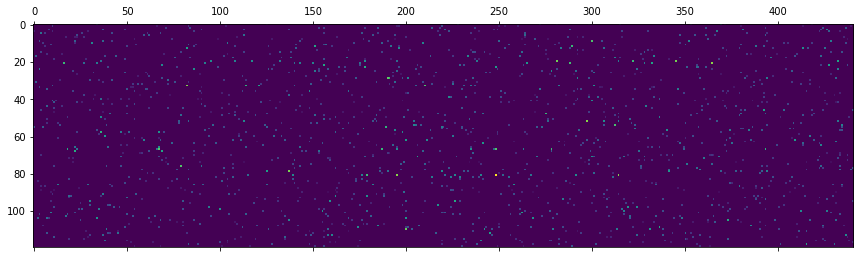

<Figure size 1080x216 with 0 Axes>

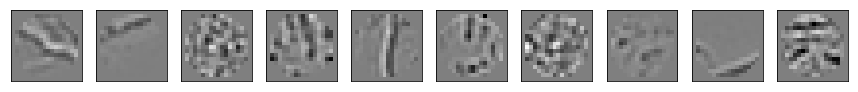

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

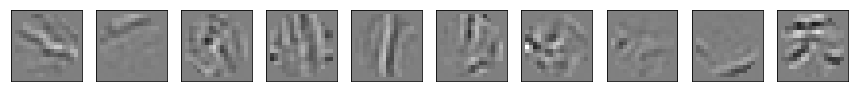

<Figure size 1080x216 with 0 Axes>

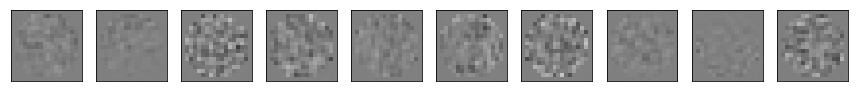

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -1.3659309041843934e-05 +/- 0.004648598711231936
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -1.3659309041843934e-05 +/- 0.10764896915698083
average energy of residual =  0.09937115952825652 +/- 0.04139653851648861
median energy of residual =  0.09819434797876389
average gain of coding =  1.9743867879362385 +/- 0.38915335324934186
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.021464753568203817
average std of codewords =  0.14431328960044126
l0-sparseness of codewords =  0.029446348852040817
std of the average of individual patches =  0.003899569223620856


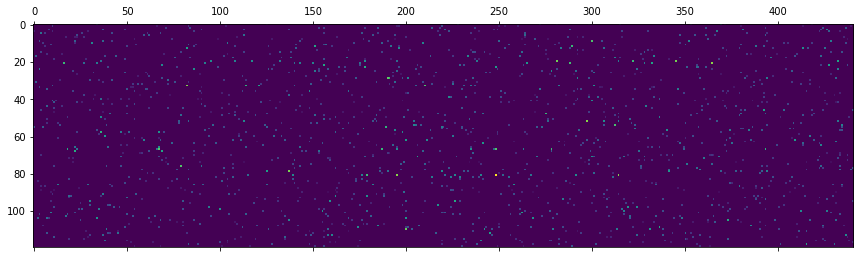

<Figure size 1080x216 with 0 Axes>

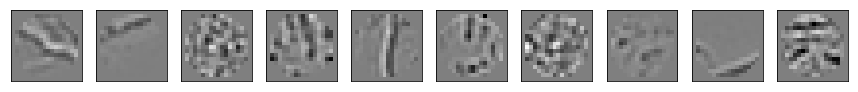

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

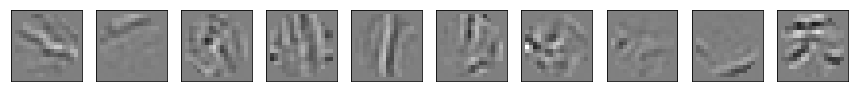

<Figure size 1080x216 with 0 Axes>

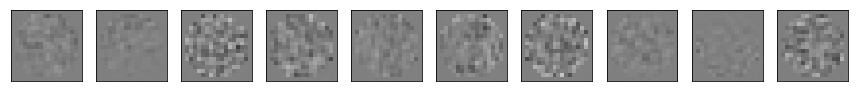

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -1.3659309041844027e-05 +/- 0.004648598711231936
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -1.3659309041844027e-05 +/- 0.10764896915698083
average energy of residual =  0.09937115952825651 +/- 0.04139653851648861
median energy of residual =  0.09819434797876389
average gain of coding =  1.9743867879362387 +/- 0.38915335324934186
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.021366252010809987
average std of codewords =  0.14340698158205642
l0-sparseness of codewords =  0.029434169501133787
std of the average of individual patches =  0.003038177444327784


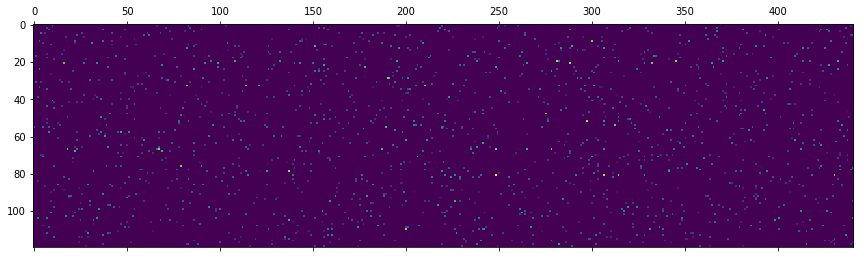

<Figure size 1080x216 with 0 Axes>

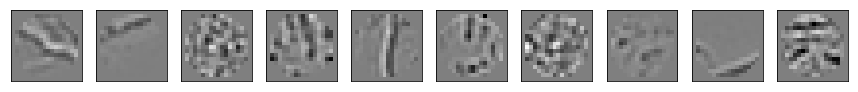

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

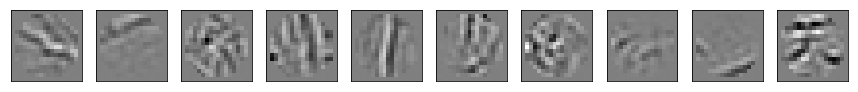

<Figure size 1080x216 with 0 Axes>

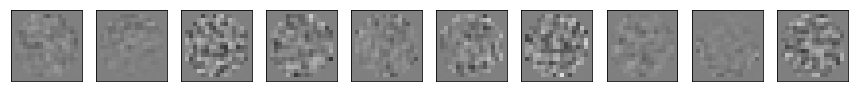

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  0.00017952400985818293 +/- 0.004568984283562022
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  0.00017952400985818293 +/- 0.10930411900950333
average energy of residual =  0.10073659596890676 +/- 0.04242123164066569
median energy of residual =  0.0990661159047943
average gain of coding =  1.9464715464926656 +/- 0.3712792579886451
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.02144250350609749
average std of codewords =  0.14432895201613197
l0-sparseness of codewords =  0.029444688031462586
std of the average of individual patches =  0.0025900570741074795


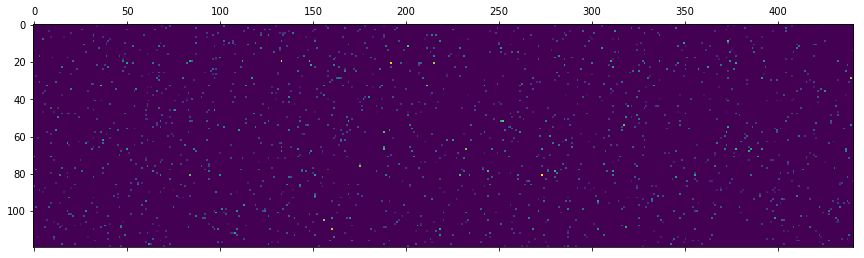

<Figure size 1080x216 with 0 Axes>

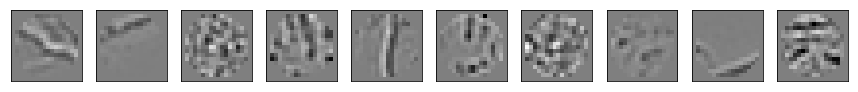

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

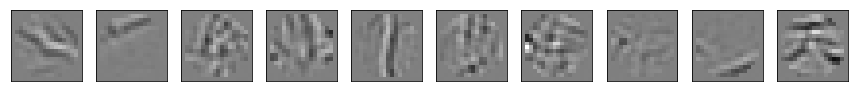

<Figure size 1080x216 with 0 Axes>

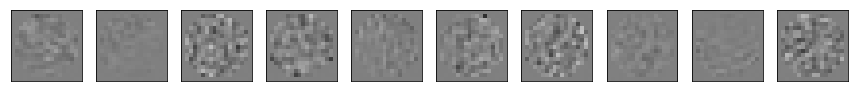

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -0.00028253612339163535 +/- 0.0046977563975449145
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -0.00028253612339163535 +/- 0.10756552932976897
average energy of residual =  0.09927565872193564 +/- 0.04140973933726432
median energy of residual =  0.09850441348268477
average gain of coding =  1.9770975808684872 +/- 0.39146920011417324
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.02144250350609749
average std of codewords =  0.14432895201613194
l0-sparseness of codewords =  0.029444688031462586
std of the average of individual patches =  0.0025900570741074795


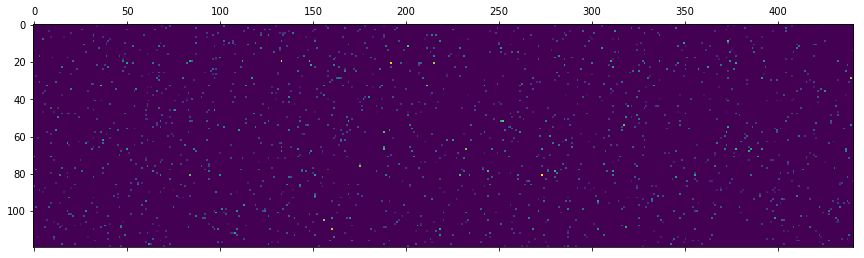

<Figure size 1080x216 with 0 Axes>

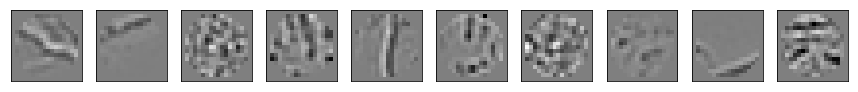

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

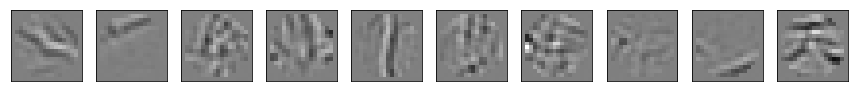

<Figure size 1080x216 with 0 Axes>

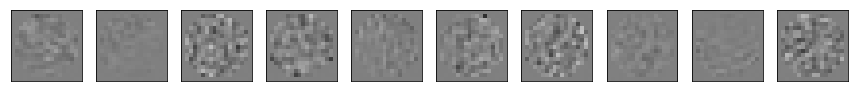

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -0.00028253612339163497 +/- 0.0046977563975449145
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -0.00028253612339163497 +/- 0.10756552932976897
average energy of residual =  0.09927565872193564 +/- 0.04140973933726432
median energy of residual =  0.09850441348268477
average gain of coding =  1.9770975808684872 +/- 0.39146920011417324
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.02144007718067574
average std of codewords =  0.14431055524352654
l0-sparseness of codewords =  0.029435276714852607
std of the average of individual patches =  0.002353232416404349


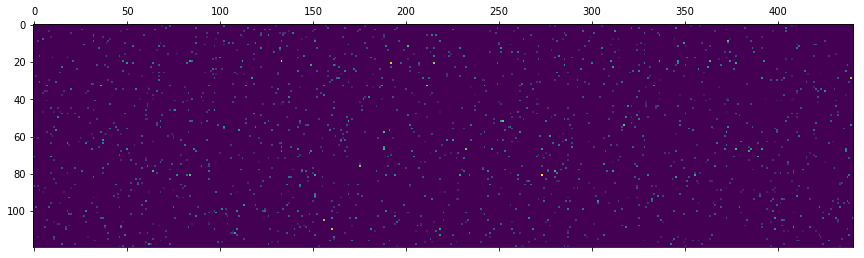

<Figure size 1080x216 with 0 Axes>

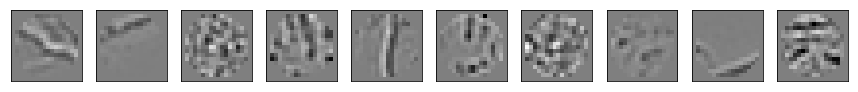

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

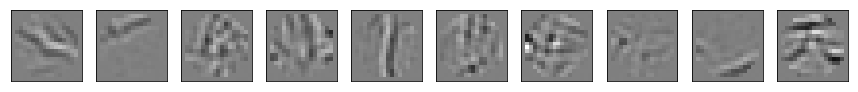

<Figure size 1080x216 with 0 Axes>

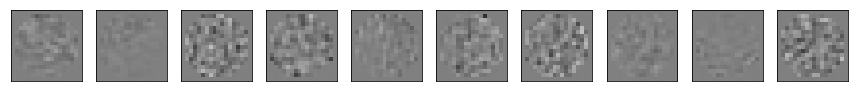

average of data patches =  -0.000120224792836511 +/- 0.005833718807624337
average of residual patches =  -0.00023849017498489924 +/- 0.0047085559620553925
median energy of data =  0.18799682320600752
average energy of data =  0.1886447531819535 +/- 0.07023119141832547
average error =  -0.00023849017498489924 +/- 0.10764446679013716
average energy of residual =  0.09935763870265718 +/- 0.04141796397131024
median energy of residual =  0.09847836436173847
average gain of coding =  1.9740121836711042 +/- 0.3879918620293837


In [8]:
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(42*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(42*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [9]:
coding_gain

{'None': {'Non': 1.9719010792608167,
  'One': 1.9719010792608167,
  'Hom': 1.9020493270352747},
 'HAP': {'Non': 1.9743867879362385,
  'One': 1.9743867879362387,
  'Hom': 1.9464715464926656},
 'HEH': {'Non': 1.9770975808684872,
  'One': 1.9770975808684872,
  'Hom': 1.9740121836711042}}

## Version used

In [10]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
Fri May 11 15:32:57 2018 CEST